#Proyecto Bicicletas de la Ciudad de los Angeles, California

Name: Luisa Ramos

##Descripción
En Los Ángeles existe un sistema compartido de bicicletas que brinda datos anónimos acerca
del uso del servicio. La tabla que se proporciona contiene el histórico de viajes que se han
realizado desde 2016 y contiene una columna que es de particular interés y que se buscará
analizar a más profundidad: Passholder_type. A continuación se presentan las columnas
que contiene la tabla:
- trip_id: identificador único para el viaje
- duration: duración del viaje en minutos
- start_time: dia/hora donde en viaje inicia en formato ISO 8601 tiempo local
- end_time: dia/hora donde el viaje termina en formato ISO 8601 tiempo local
- start_station: la estación donde el viaje inició
- start_lat: la latitud de la estación donde el viaje se originó
- start_lon: la longitud de la estación donde el viaje se originó
- end_station: la estación donde el viaje terminó
- end_lat: la latitud de la estación donde terminó el viaje
- end_lon: la longitud de la estación donde terminó el viaje
- bike_id: un entero único que identifica la bicicleta
- plan_duration: número de días que el usuario tendrá el paso. 0 significa un viaje único
(Walk-up plan)
- trip_route_category: “Round trip” son viajes que empiezan y terminan en la misma
estación
- passholder_type: El nombre del plan de passholder

##Cargando Librerias y Archivos

#####Cargando Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####Cargando Librerias

In [2]:
!pip install pandas scikit-learn

In [3]:
# Importando las librerías básicas de Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#####Cargardo DataSets Train and Test

######DataSet Train & Test

In [4]:
# Definiendo la ruta al archivo
path = "/content/drive/MyDrive/Colab Notebooks/TestBikes/datasets/"
train_data_path = os.path.join(path, "train_set.csv")
test_data_path = os.path.join(path, "test_set.csv")

In [5]:
# Leyendo el dataset de train
train_data = pd.read_csv(train_data_path)
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 74.8+ MB
None


In [6]:
# Leyendo el dataset Test
test_data = pd.read_csv(test_data_path)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569886 entries, 0 to 569885
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              569886 non-null  int64  
 1   duration             569886 non-null  int64  
 2   start_time           569886 non-null  object 
 3   end_time             569886 non-null  object 
 4   start_lat            565264 non-null  float64
 5   start_lon            565264 non-null  float64
 6   end_lat              554995 non-null  float64
 7   end_lon              554995 non-null  float64
 8   bike_id              569886 non-null  object 
 9   trip_route_category  569886 non-null  object 
 10  start_station        569886 non-null  int64  
 11  end_station          569886 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 52.2+ MB
None


#Analisis Exploratorio (EDA)

#####Perfil DataSet

In [7]:
train_data.head(15)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443
5,63406498,30,2017-12-16 15:18:00,2017-12-16 15:48:00,34.135250,-118.132370,34.135250,-118.132370,05768,0.0,Round Trip,Walk-up,4158,4158
6,25033469,11,2017-04-15 22:02:00,2017-04-15 22:13:00,34.045181,-118.250237,34.053570,-118.266357,06527,30.0,One Way,Monthly Pass,3067,3040
7,107479459,15,2018-10-16 17:27:00,2018-10-16 17:42:00,34.041130,-118.267982,34.045422,-118.253517,06333,1.0,One Way,Walk-up,3011,3051
8,132750788,19,2019-11-16 11:24:27,2019-11-16 11:43:49,34.046822,-118.248352,34.046822,-118.248352,19855,30.0,Round Trip,Monthly Pass,3038,3038
9,107465757,8,2018-10-16 12:05:00,2018-10-16 12:13:00,34.052872,-118.247490,34.046070,-118.233093,05926,1.0,One Way,Walk-up,3046,3022


In [8]:
test_data.head(15)

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,trip_route_category,start_station,end_station
0,17059130,12,1/1/2017 0:24,1/1/2017 0:36,34.058319,-118.246094,34.058319,-118.246094,6351,Round Trip,3028,3028
1,17059129,17,1/1/2017 0:28,1/1/2017 0:45,34.049980,-118.247162,34.043732,-118.260139,5836,One Way,3027,3018
2,17059126,20,1/1/2017 0:39,1/1/2017 0:59,34.063389,-118.236160,34.044159,-118.251579,6529,One Way,3066,3055
3,17059125,12,1/1/2017 0:43,1/1/2017 0:55,34.048851,-118.246422,34.050140,-118.233238,6029,One Way,3029,3079
4,17061379,48,1/1/2017 0:56,1/1/2017 1:44,34.049198,-118.252831,34.049198,-118.252831,6680,Round Trip,3063,3063
5,17063646,25,1/1/2017 1:54,1/1/2017 2:19,34.064281,-118.238937,34.050911,-118.240967,6174,One Way,3078,3023
6,17063640,16,1/1/2017 2:00,1/1/2017 2:16,34.046520,-118.237411,34.046612,-118.262733,5931,One Way,3082,3008
7,17063641,19,1/1/2017 2:00,1/1/2017 2:19,34.064281,-118.238937,34.050911,-118.240967,6447,One Way,3078,3023
8,17063634,30,1/1/2017 2:25,1/1/2017 2:55,34.046612,-118.262733,34.046822,-118.248352,5805,One Way,3008,3038
9,17065904,14,1/1/2017 3:41,1/1/2017 3:55,34.046070,-118.233093,34.056610,-118.237213,6598,One Way,3022,3014


#####Valores Perdidos

In [9]:
#Valores Perdidos en dataset train
pd.DataFrame(data={'% of Missing Values':round(train_data.isna().sum()/train_data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
end_lat,2.65
end_lon,2.65
start_lat,0.79
start_lon,0.79
passholder_type,0.37
plan_duration,0.03
trip_id,0.00
duration,0.00
start_time,0.00
end_time,0.00


In [10]:
#Valores Perdidos en dataset test
pd.DataFrame(data={'% of Missing Values':round(test_data.isna().sum()/test_data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
end_lat,2.61
end_lon,2.61
start_lat,0.81
start_lon,0.81
trip_id,0.00
duration,0.00
start_time,0.00
end_time,0.00
bike_id,0.00
trip_route_category,0.00


######**NOTA: ** Tenemos valores perdidos en ambos dataset


#####Valores Unicos

In [11]:
train_data.nunique()

,0
trip_id,700000
duration,1434
start_time,567695
end_time,547772
start_lat,337
start_lon,435
end_lat,342
end_lon,439
bike_id,7563
plan_duration,6


In [12]:
test_data.nunique()

,0
trip_id,569886
duration,1411
start_time,479258
end_time,463945
start_lat,336
start_lon,433
end_lat,339
end_lon,435
bike_id,6893
trip_route_category,2


#####Valores Nulos

In [13]:
print("\nTrain - Valores nulos:")
print(train_data.isnull().sum())


Train - Valores nulos:
trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               5563
start_lon               5563
end_lat                18574
end_lon                18574
bike_id                    0
plan_duration            208
trip_route_category        0
passholder_type         2576
start_station              0
end_station                0
dtype: int64


In [14]:
print("\nTest - Valores nulos:")
print(test_data.isnull().sum())


Test - Valores nulos:
trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_lat               4622
start_lon               4622
end_lat                14891
end_lon                14891
bike_id                    0
trip_route_category        0
start_station              0
end_station                0
dtype: int64


######**NOTA: ** Tenemos Valores Nulos en ambos datasets

###Tratamiento de Valores NULOS **Pre-procesamiento**

1. Las Columnas de start_lat, start_lot, end_lat, end_lot. Podemos reemplazarla con la mediana para evitar los valores atipicos.
2. Las Columnas de passholder_type y plan_duration. Como son variables categóricas entonces podemos reemplazarla con el valor "desconocido"


In [15]:
# Valor de la mediana
imputer_num = SimpleImputer(strategy='median')

# Aplicar valor a las variables numericas con nulos
station_coords = ['start_lat', 'start_lon', 'end_lat', 'end_lon']
train_data[station_coords] = imputer_num.fit_transform(train_data[station_coords])
test_data[station_coords] = imputer_num.transform(test_data[station_coords])

In [16]:
# Aplicar valor desconocido a la variable categorica
train_data['passholder_type'] = train_data['passholder_type'].fillna('desconocido')

# Aplicar plan_duration con la mediana
train_data['plan_duration'].fillna(train_data['plan_duration'].median(), inplace=True)

In [17]:
print("Valores nulos en train_data después del tratamiento:")
print(train_data.isnull().sum())

print("\n\nValores nulos en test_data después del tratamiento:")
print(test_data.isnull().sum())


Valores nulos en train_data después del tratamiento:
trip_id                0
duration               0
start_time             0
end_time               0
start_lat              0
start_lon              0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
start_station          0
end_station            0
dtype: int64


Valores nulos en test_data después del tratamiento:
trip_id                0
duration               0
start_time             0
end_time               0
start_lat              0
start_lon              0
end_lat                0
end_lon                0
bike_id                0
trip_route_category    0
start_station          0
end_station            0
dtype: int64


#####**Conclusion: ** Las variables numericas se Imputaron con la mediana. y las variables categoricas con "desconocido"

#Análisis de los Datos
1. Tendencia de los usuarios por tipo de pase (mensual y anual)
2. Demanda por estación
3. Demanda por horario
4. Demanda por plan (passholder)
5. Analisis de crecimiento de planes.

###STEP1. Tendencia de los Usuarios por tipo de pase.

In [18]:
# Transformar start_time a formato de fechas y extrae el año para agrupar por año
# Asegurar que start_time sea de tipo datetime
train_data['start_time'] = pd.to_datetime(train_data['start_time'], format='%m/%d/%Y %H:%M', errors='coerce')

# Crear una columna de año y mes para análisis temporal
train_data['year_month'] = train_data['start_time'].dt.to_period('M')

In [19]:
#Contar la cantidad de viajes por tipo de pase y mes
pass_counts = train_data.groupby(['year_month', 'passholder_type']).size().unstack()
print(pass_counts)

passholder_type  Annual Pass  Flex Pass  Monthly Pass  One Day Pass  Testing  \
year_month                                                                     
2017-01                  NaN      370.0        3528.0           NaN      NaN   
2017-02                  NaN      343.0        3398.0           NaN      NaN   
2017-03                  NaN      557.0        4655.0           NaN      NaN   
2017-07                  NaN      589.0        8290.0           NaN      NaN   
2017-08                  NaN      538.0        9678.0           NaN      NaN   
2017-09                  NaN      566.0        8466.0           NaN      NaN   
2019-07               1083.0        5.0        8869.0         431.0      4.0   
2019-08               1167.0        NaN       11210.0        1333.0      3.0   
2019-09               1188.0        NaN       11506.0        1096.0     14.0   
2020-01               2111.0        NaN       10231.0         875.0      4.0   
2020-02               2077.0        NaN 

<Figure size 1200x600 with 0 Axes>

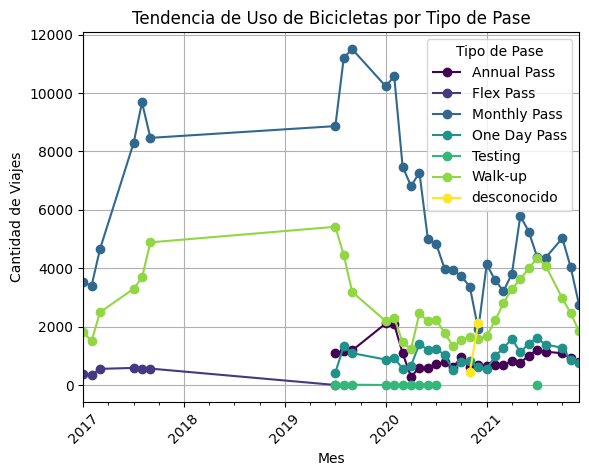

In [20]:
# Configuración de gráfico
plt.figure(figsize=(12, 6))
pass_counts.plot(kind='line', marker='o', colormap='viridis')

plt.title("Tendencia de Uso de Bicicletas por Tipo de Pase")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Viajes")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Pase")
plt.grid(True)
plt.show()

#####**Conclusión:** En la gráfica de tendencia se visualiza cual es el tipo de pase y el crecimiento. Identificando que el pase por "MES" es el mas usado. Aunque se visualiza que va a la baja.
El segundo mas usado es Walk-up. Se visualiza un pequeño aumento en el pase Anual.
Podemos afirmar que los usuarios prefieren el pase MONTHLY. Se puede decir que los usuarios de WALK-UP, son usuarios ocasionales pero es un ingreso considerable especialmente en las horas pico.
Se puede decir que la caida en 2020 podria relacionarse con la pandemia, afectando a todos los planes.

###STEP2. Demanda por estación

In [21]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [22]:
# Convertir start_time a datetime
train_data['start_time'] = pd.to_datetime(train_data['start_time'])

# Extraer hora del día y día de la semana
train_data['hour'] = train_data['start_time'].dt.hour
train_data['day_of_week'] = train_data['start_time'].dt.dayofweek  # 0 = Lunes, 6 = Domingo

In [23]:
# Frecuencia de viajes por estación de inicio
start_station_counts = train_data['start_station'].value_counts().head(10)  # Top 10 estaciones
print("Viajes por estación de inicio (Top 10):")
print(start_station_counts)

Viajes por estación de inicio (Top 10):
start_station
3005    28490
3030    20280
3014    18739
4214    17466
3031    17069
3035    15381
3064    14733
3082    13667
4210    13379
3042    12667
Name: count, dtype: int64


In [24]:
# Frecuencia de viajes por estación de fin
end_station_counts = train_data['end_station'].value_counts().head(10)  # Top 10 estaciones
print("\nViajes por estación de fin (Top 10):")
print(end_station_counts)


Viajes por estación de fin (Top 10):
end_station
3005    30576
3014    20688
3031    18401
3030    17407
4215    16974
3035    15830
3082    15450
3064    15048
4214    15010
3042    14852
Name: count, dtype: int64


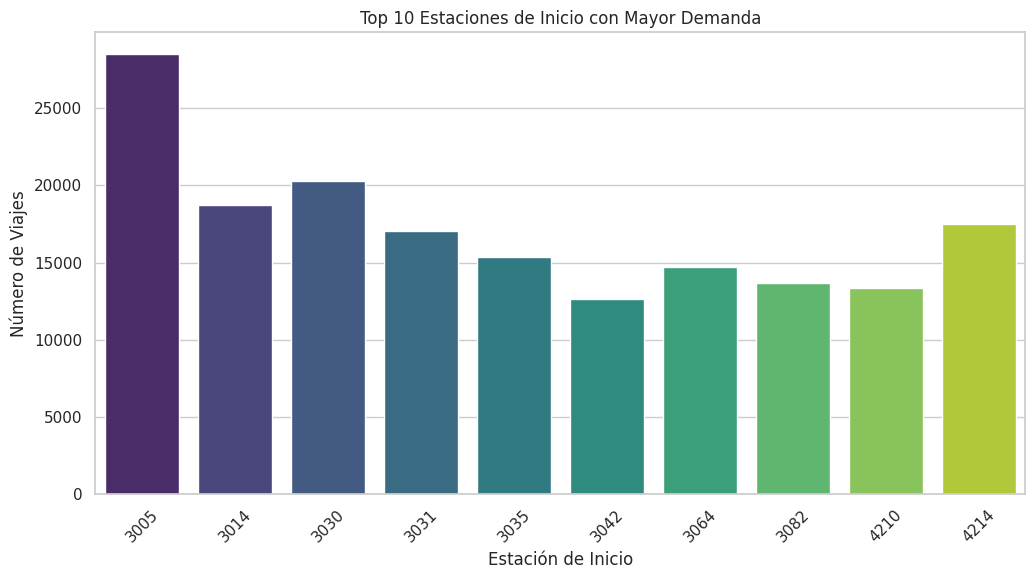

In [25]:
# Gráfico de barras para demanda por estación de inicio
plt.figure(figsize=(12, 6))

sns.barplot(x=start_station_counts.index, y=start_station_counts.values, palette="viridis")

plt.title('Top 10 Estaciones de Inicio con Mayor Demanda')
plt.xlabel('Estación de Inicio')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()

#####**Conclusión:** La saturación de las estaciones claves como 3005, 3014, 3030; son criticas y requieren mayor capacidad de bicicletas y estacionamientos. Se puede indicar que las estaciones mas demandas de inicio son 3005, 3014,3030 y de fin 3005, 3014, 3031. Lo que puede indicar que son viajes de ida y vuelta cortos.

###STEP3. Demanda por horario

In [26]:
# Distribución de viajes por hora del día
hourly_counts = train_data['hour'].value_counts().sort_index()
print("\nDistribución de viajes por hora del día:")
print(hourly_counts)


Distribución de viajes por hora del día:
hour
0.0      3241
1.0      2097
2.0      1387
3.0       715
4.0       811
5.0      1253
6.0      4280
7.0      8935
8.0     13603
9.0     14855
10.0    15565
11.0    20235
12.0    23691
13.0    24499
14.0    23929
15.0    25040
16.0    26882
17.0    29022
18.0    26669
19.0    21633
20.0    15436
21.0    10943
22.0     7543
23.0     5165
Name: count, dtype: int64


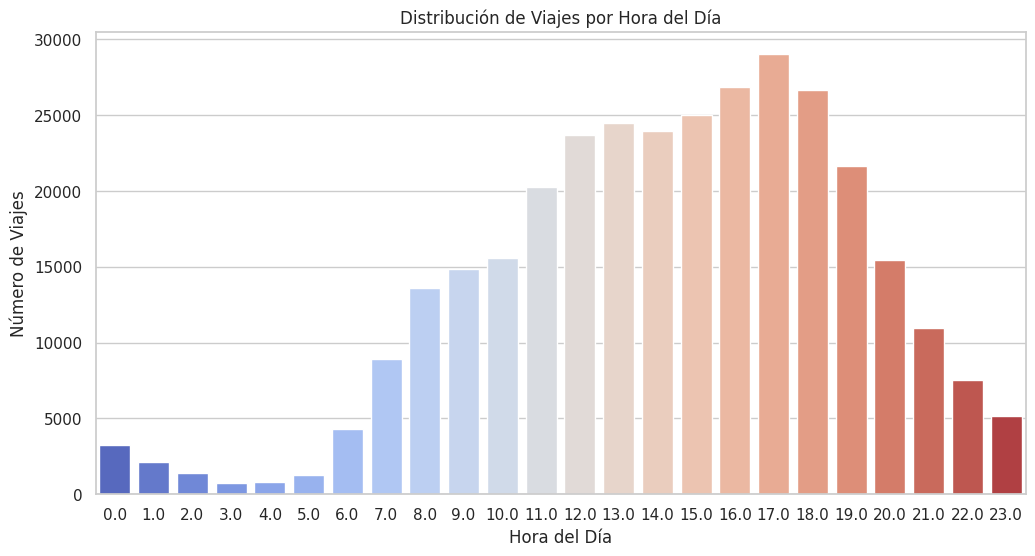

In [27]:
# Gráfico de barras para demanda por hora del día
plt.figure(figsize=(12, 6))

sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="coolwarm")

plt.title('Distribución de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.show()

#####**Conclusión:** Se puede observar un patrón de hora pico entre las 15hrs y 18hrs lo podemos vincular con los horarios laborales.

In [28]:
# Distribución de viajes por día de la semana
daily_counts = train_data['day_of_week'].value_counts().sort_index()
print("\nDistribución de viajes por día de la semana:")
print(daily_counts)



Distribución de viajes por día de la semana:
day_of_week
0.0    43201
1.0    46209
2.0    45682
3.0    46501
4.0    48850
5.0    49847
6.0    47139
Name: count, dtype: int64


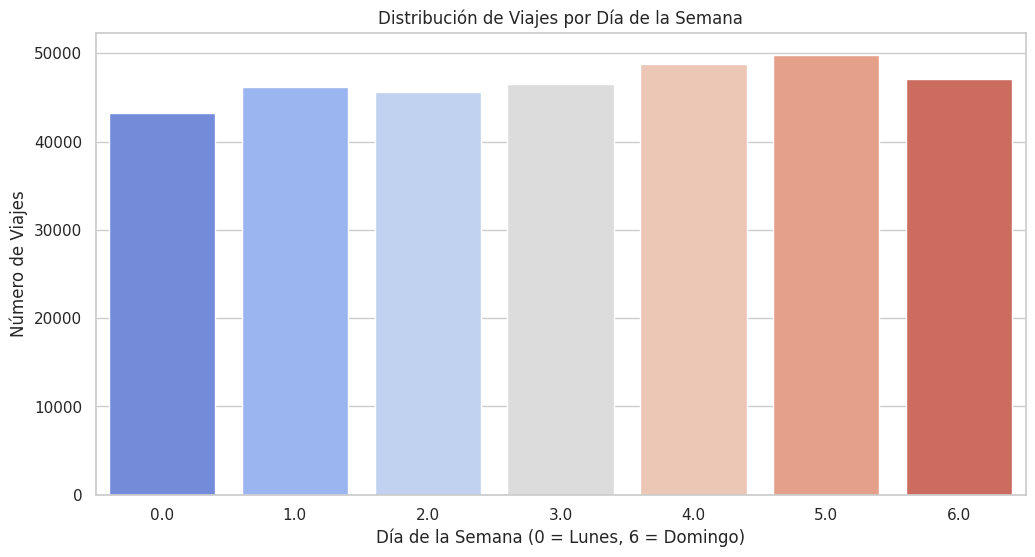

In [29]:
# Gráfico de barras para demanda por día de la semana
plt.figure(figsize=(12, 6))

sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="coolwarm")

plt.title('Distribución de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Número de Viajes')
plt.show()

#####**Conclusión:** Mayor uso del dia de la semana es viernes y sabados. El patrón seria que esta ligado al pase ONE DAY o WALK-UP

###STEP4. Demanda por Plan. PassHolder_type

In [30]:
# Distribución de viajes por tipo de plan
plan_counts = train_data['passholder_type'].value_counts()
print("\nDistribución de viajes por tipo de plan:")
print(plan_counts)


Distribución de viajes por tipo de plan:
passholder_type
Monthly Pass    394769
Walk-up         212426
One Day Pass     44455
Annual Pass      34092
Flex Pass        11604
desconocido       2576
Testing             78
Name: count, dtype: int64


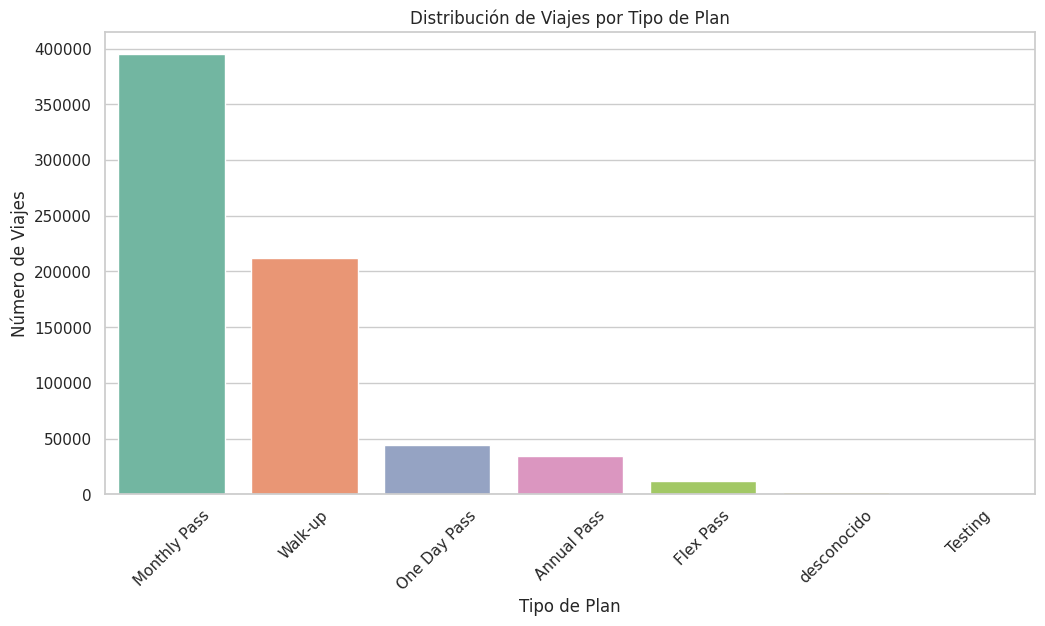

In [31]:
# Gráfico de barras para demanda por tipo de plan
plt.figure(figsize=(12, 6))

sns.barplot(x=plan_counts.index, y=plan_counts.values, palette="Set2")

plt.title('Distribución de Viajes por Tipo de Plan')
plt.xlabel('Tipo de Plan')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.show()

#####**Conclusión:** Se mantiene un uso de pase MONTHLY. Se puede sugeirir una estrategia de suscripciones mensuales para retener a los usuarios frecuentes y se podria tener mas usuarios en plan anual.

###STEP5. Analisis de Crecimiento de Planes

####A) Crecimiento por plan

In [32]:
# Extraer la fecha de start_time y crear una nueva columna 'date'
train_data['date'] = train_data['start_time'].dt.date

In [33]:
# Agrupar por fecha y tipo de plan
plan_growth = train_data.groupby(['date', 'passholder_type']).size().unstack()
print(plan_growth)

passholder_type  Annual Pass  Flex Pass  Monthly Pass  One Day Pass  Testing  \
date                                                                           
2017-01-01               NaN        7.0          53.0           NaN      NaN   
2017-01-02               NaN       15.0          82.0           NaN      NaN   
2017-01-03               NaN       14.0         120.0           NaN      NaN   
2017-01-04               NaN        7.0         131.0           NaN      NaN   
2017-01-05               NaN        6.0          96.0           NaN      NaN   
...                      ...        ...           ...           ...      ...   
2021-12-27              13.0        NaN          39.0           4.0      NaN   
2021-12-28              12.0        NaN          82.0          19.0      NaN   
2021-12-29               7.0        NaN          28.0           5.0      NaN   
2021-12-30              11.0        NaN          15.0           4.0      NaN   
2021-12-31              28.0        NaN 

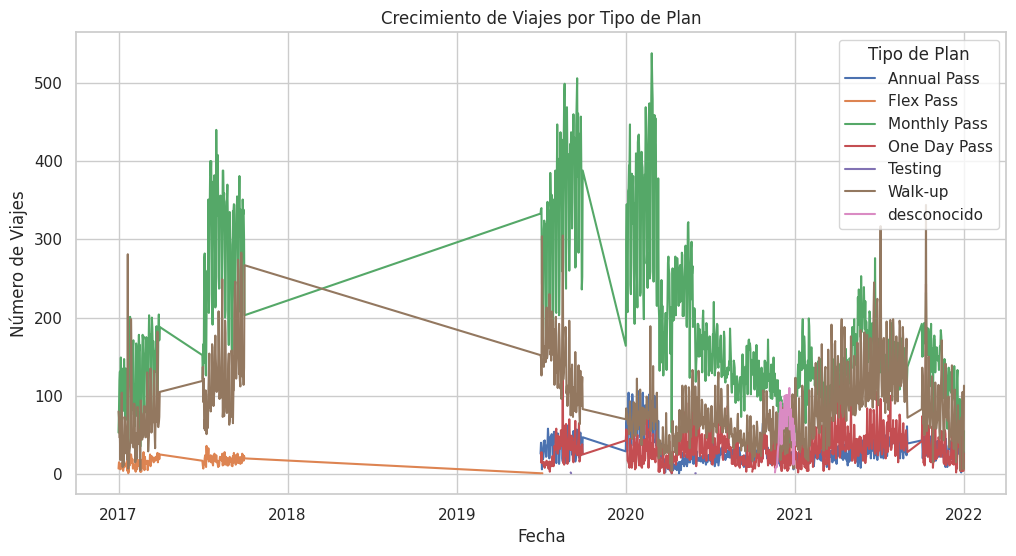

In [34]:
# Gráfico de líneas para crecimiento por plan
plt.figure(figsize=(12, 6))
for plan in plan_growth.columns:
    plan_growth[plan].plot(label=plan)
plt.title('Crecimiento de Viajes por Tipo de Plan')
plt.xlabel('Fecha')
plt.ylabel('Número de Viajes')
plt.legend(title='Tipo de Plan')
plt.show()

####B) Mapa de Calor por Demanda de Dia de la Semana y Hora
---



In [35]:
# Crear tabla pivote para mapa de calor
heatmap_data = train_data.groupby(['day_of_week', 'hour']).size().unstack()

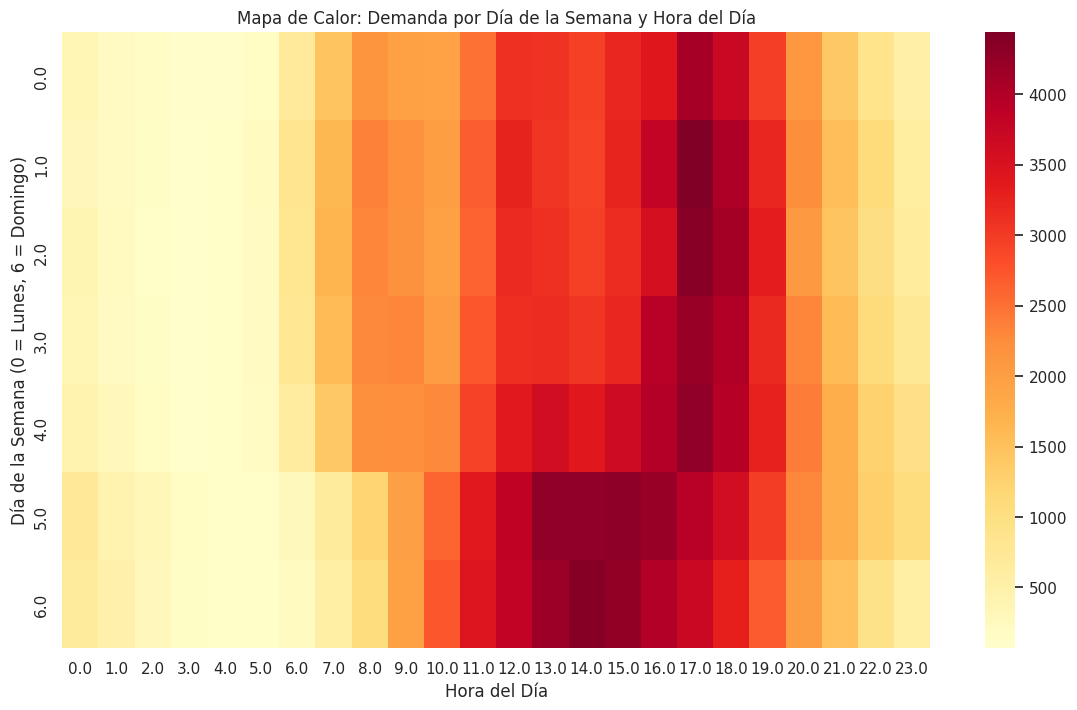

In [36]:
# Gráfico de mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False)

plt.title('Mapa de Calor: Demanda por Día de la Semana y Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.show()

####C) Mapa de Calor por Estación y Hora

In [37]:
#Agrupamos las estaciones de mayor demanda
top_stations = train_data['start_station'].value_counts().nlargest(20).index

# Filtramos solo las top 20 estaciones
filtered_data = train_data[train_data['start_station'].isin(top_stations)]

In [38]:
# Crear tabla pivote para mapa de calor
heatmap_data = filtered_data.groupby(['start_station', 'hour']).size().unstack()

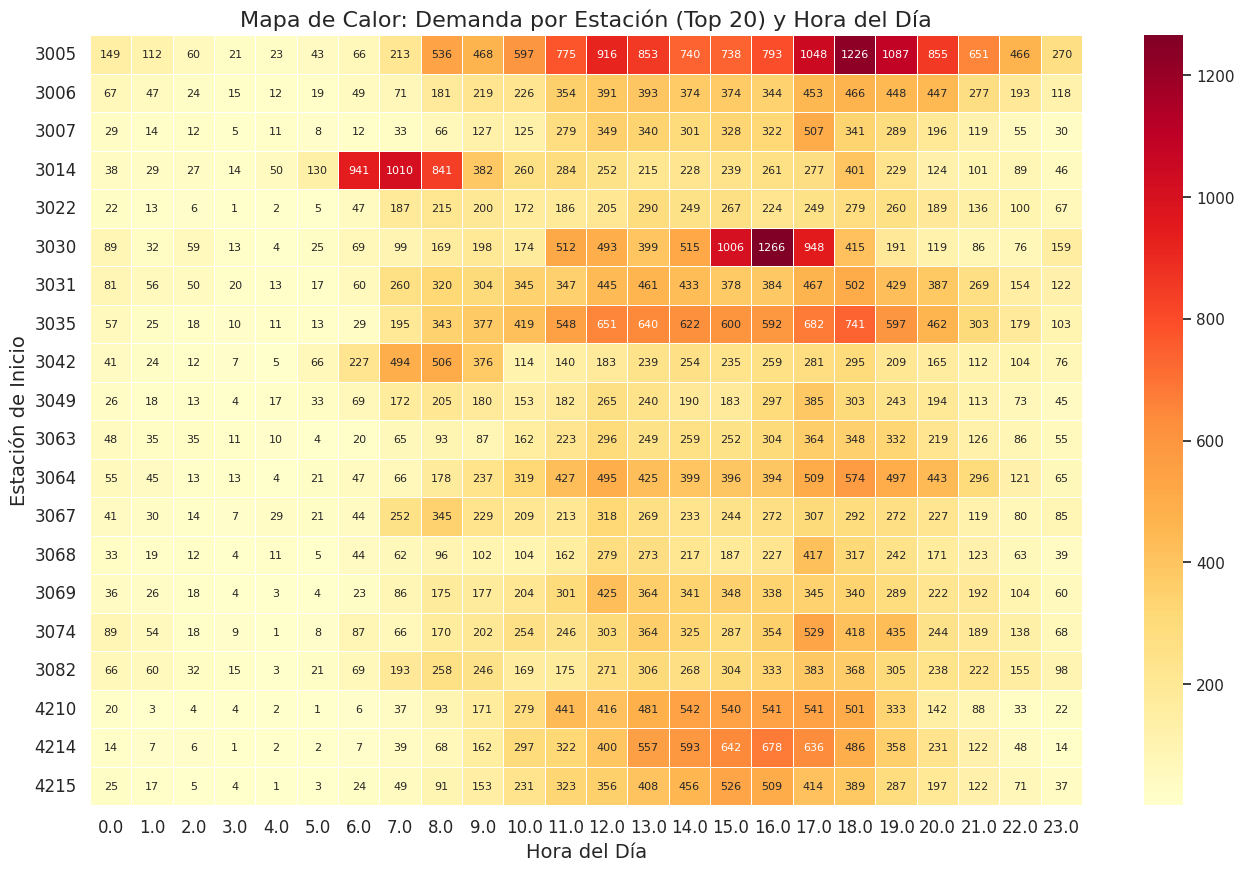

In [39]:
# Gráfico de mapa de calor con anotaciones
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5, annot_kws={"size": 8})

plt.title('Mapa de Calor: Demanda por Estación (Top 20) y Hora del Día', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Estación de Inicio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#####**Conclusión:** Las estaciones 3005 y 3030 son las que tienen alta demanda en las horas pico 7am-9am y 16hrs-18hrs. Y la estación 4212 son de mayor uso los fines de semana y mediodia.
Se puede priorizar el uso de las bicicletas en estaciones claves durante horas pico.
Tambien se observo que en el 2019 los usuarios compraron mas el pase ANNUAL y en pandemia hubo la disminución de los viajes.

###**Conclusiones y Recomendaciones**
1. Fortalecer el Pase Anual. Ofrecer Descuentos o beneficios exclusivos para retener a los usuarios leales.
2. El Pase Mensual. Representa el mayor uso del servicio. Se pueden ofrecer incentivos para aumentar la retensión de usuarios.
3. Promover uso de horarios. Promover el uso de horas bajas con tarifas reducidas.
4. En las Estaciones mas concurridas. Hacer unas mejoras de infraestructura como la disponibilidad de bicicletas, estacionmientos y mantenimiento.
5. Enfocarse en el pase por un dia One-Day-Pass mediante el uso de atracciones turisticas.
6. Monitorear por que existen registros de PASSHolder-type sin asignar.

#Graficas Importantes para mejor Visualización (PDF)

Despues del Analisis anterior podemos agregar algunas graficas importantes como:

1) Top 10 de las estaciones mas demandadas.

2) Grafico para mostrar Passholder.

In [40]:
# Configuración inicial
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
colors = sns.color_palette("pastel")

In [41]:
# Preprocesamiento básico para las visualizaciones
# Convertir fechas
train_data['start_time'] = pd.to_datetime(train_data['start_time'], format='%m/%d/%Y %H:%M', errors='coerce') # Especificar el formato para start_time
train_data['end_time'] = pd.to_datetime(train_data['end_time'], format='%m/%d/%Y %H:%M', errors='coerce') # Especificar el formato para end_time

####Top 10 de las estaciones mas demandadas

In [42]:
# Calcular frecuencias
start_counts = train_data['start_station'].value_counts().nlargest(10)
end_counts = train_data['end_station'].value_counts().nlargest(10)

In [43]:
# Dataframe para visualizar los datos
combined = pd.DataFrame({
    'Inicio': start_counts,
    'Fin': end_counts
}).stack().reset_index()
combined.columns = ['Estación', 'Tipo', 'Viajes']

In [44]:
# Imprimir datos en consola
print("\nTop 10 Estaciones de INICIO:")
print(start_counts.to_frame(name="Viajes"))
print("\nTop 10 Estaciones de FIN:")
print(end_counts.to_frame(name="Viajes"))


Top 10 Estaciones de INICIO:
               Viajes
start_station        
3005            28490
3030            20280
3014            18739
4214            17466
3031            17069
3035            15381
3064            14733
3082            13667
4210            13379
3042            12667

Top 10 Estaciones de FIN:
             Viajes
end_station        
3005          30576
3014          20688
3031          18401
3030          17407
4215          16974
3035          15830
3082          15450
3064          15048
4214          15010
3042          14852


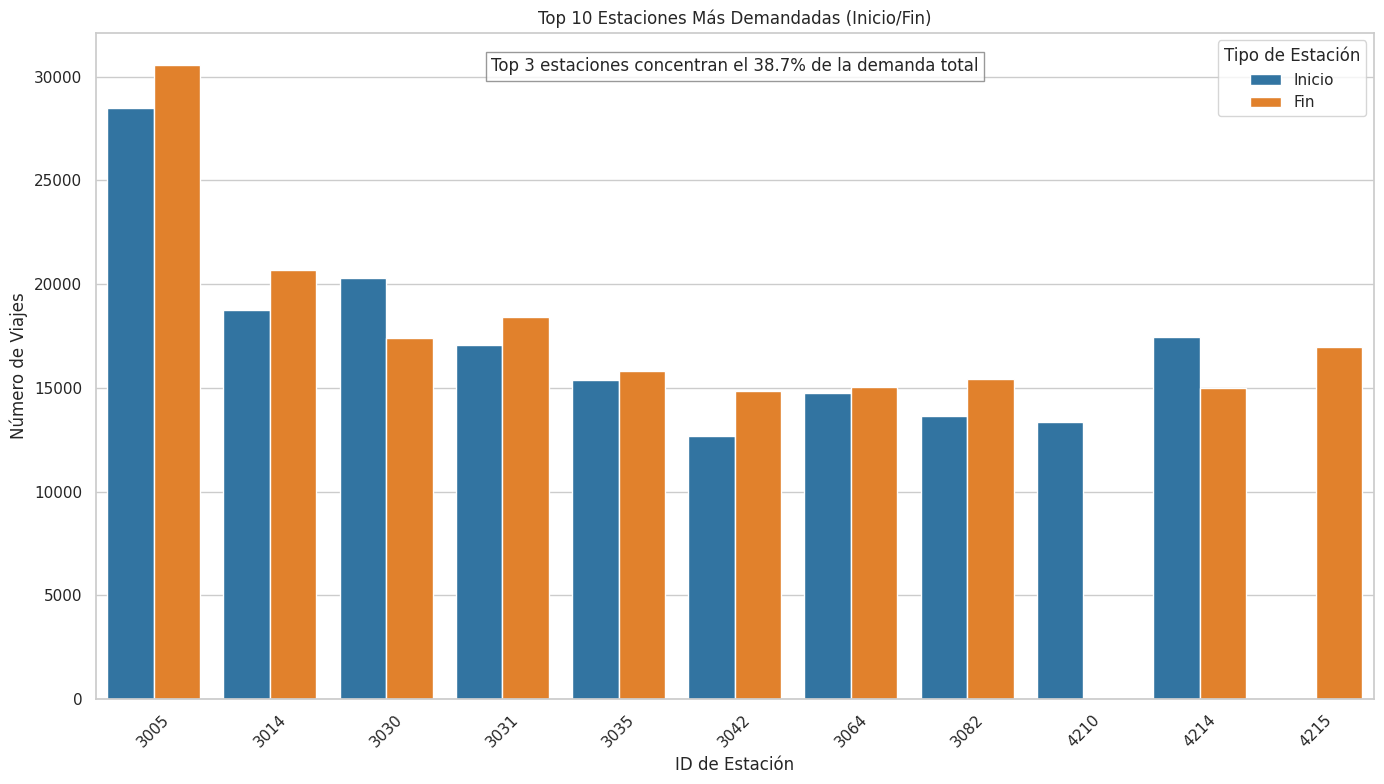

In [45]:
if not combined.empty:
    # Calcular porcentaje top 3
    total_viajes = combined['Viajes'].sum()
    top3_sum = combined.groupby('Estación')['Viajes'].sum().nlargest(3).sum()
    top3_percent = (top3_sum / total_viajes) * 100

    # Configurar la grafica
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Estación', y='Viajes', hue='Tipo',
            data=combined, palette=['#1f77b4', '#ff7f0e'])
    # grafica
    plt.text(
        x=0.5,
        y=0.95,
        s=f'Top 3 estaciones concentran el {top3_percent:.1f}% de la demanda total',
        ha='center',
        va='center',
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
    )

    plt.title('Top 10 Estaciones Más Demandadas (Inicio/Fin)')
    plt.xlabel('ID de Estación')
    plt.ylabel('Número de Viajes')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Estación')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos para generar el gráfico de estaciones")

####Grafica para Mostrar Passholder Type

In [46]:
# Calcular datos
type_counts = train_data['passholder_type'].value_counts()
explode = [0.5 if count < type_counts.max()*0.1 else 0 for count in type_counts.values]

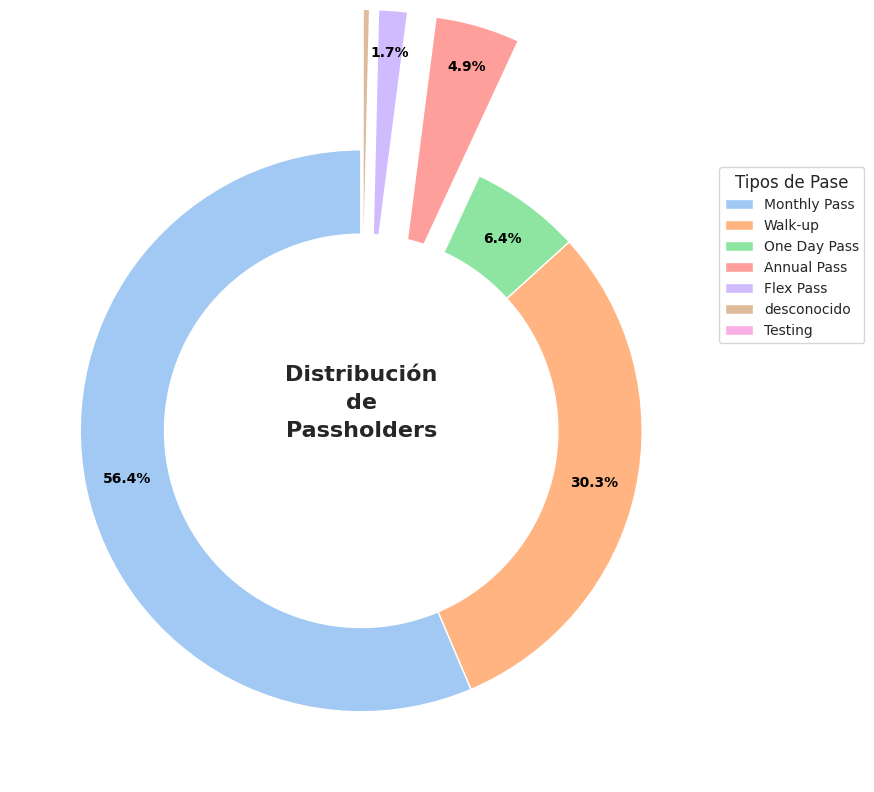

In [47]:
plt.figure(figsize=(12, 8))

# Crear gráfico de pastel sin labels
wedges, _, autotexts = plt.pie(
    type_counts,
    labels=None,
    autopct=lambda p: f'{p:.1f}%' if p >= 1 else '',
    startangle=90,
    colors=sns.color_palette("pastel"),
    explode=explode,
    pctdistance=0.85,
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'black'}
)

#Titulo centrado
plt.text(
    0, 0.1,
    'Distribución\nde\nPassholders',
    ha='center',
    va='center',
    fontsize=16,
    fontweight='bold',
    linespacing=1.5
)

#Cuadro de leyenda
plt.legend(
    wedges,
    type_counts.index,
    title="Tipos de Pase",
    loc='center left',
    bbox_to_anchor=(1, 0.5, 0.5, 0.5),
    fontsize=10
)

# grafica pay
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

In [48]:
print("Distribucion por Passholder")
type_df = type_counts.to_frame(name="Conteo")
type_df['Porcentaje'] = (type_df['Conteo'] / type_df['Conteo'].sum() * 100).round(1)
print(type_df)


Distribucion por Passholder
                 Conteo  Porcentaje
passholder_type                    
Monthly Pass     394769        56.4
Walk-up          212426        30.3
One Day Pass      44455         6.4
Annual Pass       34092         4.9
Flex Pass         11604         1.7
desconocido        2576         0.4
Testing              78         0.0


#Modelo Analítico

#####**Objetivo: ** Predecir el tipo de pase (passholder_type) basado en las demas caracteristicas del dataset

###Cargar DataSet

In [49]:
#Cargar los datos del DataSet
# dataset de train
df_train = pd.read_csv(train_data_path)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              700000 non-null  int64  
 1   duration             700000 non-null  int64  
 2   start_time           700000 non-null  object 
 3   end_time             700000 non-null  object 
 4   start_lat            694437 non-null  float64
 5   start_lon            694437 non-null  float64
 6   end_lat              681426 non-null  float64
 7   end_lon              681426 non-null  float64
 8   bike_id              700000 non-null  object 
 9   plan_duration        699792 non-null  float64
 10  trip_route_category  700000 non-null  object 
 11  passholder_type      697424 non-null  object 
 12  start_station        700000 non-null  int64  
 13  end_station          700000 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 74.8+ MB
None


In [50]:
# dataset de train
df_test = pd.read_csv(test_data_path)
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569886 entries, 0 to 569885
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              569886 non-null  int64  
 1   duration             569886 non-null  int64  
 2   start_time           569886 non-null  object 
 3   end_time             569886 non-null  object 
 4   start_lat            565264 non-null  float64
 5   start_lon            565264 non-null  float64
 6   end_lat              554995 non-null  float64
 7   end_lon              554995 non-null  float64
 8   bike_id              569886 non-null  object 
 9   trip_route_category  569886 non-null  object 
 10  start_station        569886 non-null  int64  
 11  end_station          569886 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 52.2+ MB
None


###Limpiar Datos y Columnas Inecesarias

In [51]:
#Eliminar columnas trip_id, bake_id
cols_to_drop = ["trip_id", "bike_id"]
df_train.drop(columns=[col for col in cols_to_drop if col in df_train.columns], inplace=True)
df_test.drop(columns=[col for col in cols_to_drop if col in df_test.columns], inplace=True)

In [52]:
# En el conjunto de train, eliminamos filas donde la variable objetivo (passholder_type) es nula
df_train.dropna(subset=["passholder_type"], inplace=True)

In [53]:
#Sobre train las columnas start_lat, start_lon, end_lat, ent_lon and plan-duration imputamos valores faltantes con la media.
numeric_cols_train = ['start_lat', 'start_lon', 'end_lat', 'end_lon', 'plan_duration']
for col in numeric_cols_train:
    if col in df_train.columns:
        median_val = df_train[col].median()
        df_train[col].fillna(median_val, inplace=True)

In [54]:
#Sobre test las columnas start_lat, start_lon, end_lat, ent_lon
numeric_cols_test = ['start_lat', 'start_lon', 'end_lat', 'end_lon']
for col in numeric_cols_test:
    if col in df_test.columns:
        median_val = df_test[col].median()
        df_test[col].fillna(median_val, inplace=True)

In [55]:
#DataSet train - Convertir start_time and end_time a datetime
df_train["start_time"] = pd.to_datetime(df_train["start_time"], errors="coerce")
df_train["end_time"]   = pd.to_datetime(df_train["end_time"], errors="coerce")

# En caso de que se conviertan a NaT, eliminamos filas
df_train.dropna(subset=["start_time", "end_time"], inplace=True)

In [56]:
#DataSet test - Convertir start_time and end_time a datetime
df_test["start_time"] = pd.to_datetime(df_test["start_time"], errors="coerce")
df_test["end_time"]   = pd.to_datetime(df_test["end_time"], errors="coerce")

# En caso de que se conviertan a NaT, eliminamos filas
df_test.dropna(subset=["start_time", "end_time"], inplace=True)

###Creando Nuevas Caracteristicas

In [57]:
#Duracion del viaje
df_train["duration"] = (df_train["end_time"] - df_train["start_time"]).dt.total_seconds() / 60
df_test["duration"]  = (df_test["end_time"] - df_test["start_time"]).dt.total_seconds() / 60

In [58]:
#Dia de la semana que inicio el viaje (0-Lunes, 6-Domingo)
df_train["day_of_week"] = df_train["start_time"].dt.dayofweek
df_test["day_of_week"]  = df_test["start_time"].dt.dayofweek

In [59]:
#Hora que inicio el Viaje
df_train["hour_of_day"] = df_train["start_time"].dt.hour
df_test["hour_of_day"]  = df_test["start_time"].dt.hour

In [60]:
#Verificand el viaje redondo
df_train["round_trip"] = (df_train["start_station"] == df_train["end_station"]).astype(int)
df_test["round_trip"]  = (df_test["start_station"] == df_test["end_station"]).astype(int)

In [61]:
print("Información del conjunto de entrenamiento:")
print(df_train.info())
print("\nPrimeras filas:")
print(df_train.head(5))

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
Index: 372571 entries, 0 to 699998
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   duration             372571 non-null  float64       
 1   start_time           372571 non-null  datetime64[ns]
 2   end_time             372571 non-null  datetime64[ns]
 3   start_lat            372571 non-null  float64       
 4   start_lon            372571 non-null  float64       
 5   end_lat              372571 non-null  float64       
 6   end_lon              372571 non-null  float64       
 7   plan_duration        372571 non-null  float64       
 8   trip_route_category  372571 non-null  object        
 9   passholder_type      372571 non-null  object        
 10  start_station        372571 non-null  int64         
 11  end_station          372571 non-null  int64         
 12  day_of_week          372571 non-nu

In [62]:
print("\nInformación del conjunto de prueba:")
print(df_test.info())
print("\nPrimeras filas:")
print(df_test.head(5))


Información del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
Index: 266015 entries, 0 to 569885
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   duration             266015 non-null  float64       
 1   start_time           266015 non-null  datetime64[ns]
 2   end_time             266015 non-null  datetime64[ns]
 3   start_lat            266015 non-null  float64       
 4   start_lon            266015 non-null  float64       
 5   end_lat              266015 non-null  float64       
 6   end_lon              266015 non-null  float64       
 7   trip_route_category  266015 non-null  object        
 8   start_station        266015 non-null  int64         
 9   end_station          266015 non-null  int64         
 10  day_of_week          266015 non-null  int32         
 11  hour_of_day          266015 non-null  int32         
 12  round_trip           266015 non-null  in

In [63]:
# Guardar los datasets procesados
df_train.to_csv(path + "train_clean.csv", index=False)
df_test.to_csv(path + "test_clean.csv", index=False)

###Codificando Variable Objeto

In [64]:
#librerias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
cd_train = df_train.copy()
cd_test = df_test.copy()

In [66]:
#Definir varaiables Features and Taget
Features = ['duration', 'day_of_week', 'hour_of_day', 'round_trip', 'plan_duration']
Target = 'passholder_type'

In [67]:
#Codificar variable objeto
le = LabelEncoder()
cd_train[Target] = le.fit_transform(cd_train[Target])

In [68]:
#Dividir los datos
X = cd_train[Features]
y = cd_train[Target]

In [69]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

###Entrenando el Modelo

####Modelo Random Forest

In [70]:
#Modelo RandomForestClassifer
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

In [71]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
#Evaluando el Modelo
y_pred = model.predict(X_val)

In [73]:
#Valores
print("Métricas de RandomForest:")
print(classification_report(y_val, y_pred, target_names=le.classes_))

Métricas de RandomForest:
              precision    recall  f1-score   support

 Annual Pass       0.58      0.57      0.57      1951
   Flex Pass       0.52      0.64      0.57      1727
Monthly Pass       0.99      0.99      0.99     41934
One Day Pass       0.25      0.49      0.33      3621
     Testing       1.00      1.00      1.00         8
     Walk-up       0.90      0.75      0.82     25274

    accuracy                           0.87     74515
   macro avg       0.71      0.74      0.71     74515
weighted avg       0.90      0.87      0.88     74515



####Validación Cruzada - Random Forest

In [74]:
#librerias
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [75]:
#Definir el modelo
rf = RandomForestClassifier(random_state=42)

In [76]:
# Usando Scaler en StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Variable Categorica
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(cd_train['passholder_type'])

In [77]:
# Validando Modelo
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_scaled, y_encoded, cv=cv, scoring='f1_macro')

In [78]:
print("Random Forest Cross-Validation F1 Macro scores:")
print(cv_scores)
print("Mean F1 Macro score: {:.4f}".format(np.mean(cv_scores)))

Random Forest Cross-Validation F1 Macro scores:
[0.706192   0.69462385 0.68029925 0.67178254 0.71111012]
Mean F1 Macro score: 0.6928


In [79]:
#Ajuste de Hiperparametros con GridSearchCV para RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [80]:
grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_scaled, y_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro')

In [81]:
#Evaluando los Hiperparametros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("\nF1 Macro score: {:.4f}".format(grid_search.best_score_))


Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

F1 Macro score: 0.6990


In [82]:
#Modelo Optimizado
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

In [83]:
#Evaluando Resultados de validacion
print("\nEvaluación en el conjunto de validacion")
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Precision (macro): {:.4f}".format(precision_score(y_val, y_pred, average='macro')))
print("Recall (macro): {:.4f}".format(recall_score(y_val, y_pred, average='macro')))
print("F1-score (macro): {:.4f}".format(f1_score(y_val, y_pred, average='macro')))
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred, target_names=le.classes_))



Evaluación en el conjunto de validacion
Accuracy: 0.0482
Precision (macro): 0.0270
Recall (macro): 0.0396
F1-score (macro): 0.0315

Reporte de clasificación:
               precision    recall  f1-score   support

 Annual Pass       0.04      0.07      0.05      1951
   Flex Pass       0.03      0.04      0.04      1727
Monthly Pass       0.02      0.01      0.01     41934
One Day Pass       0.00      0.00      0.00      3621
     Testing       0.00      0.00      0.00         8
     Walk-up       0.07      0.12      0.09     25274

    accuracy                           0.05     74515
   macro avg       0.03      0.04      0.03     74515
weighted avg       0.03      0.05      0.04     74515



In [84]:
#Interpretacion del Modelo
print("\nImportancia de las variables")
feature_importances = best_rf.feature_importances_
# Changed 'features' to 'Features' as this is the list of features you defined
for feat, importance in zip(Features, feature_importances):
    print(f"{feat}: {importance:.4f}")


Importancia de las variables
duration: 0.1560
day_of_week: 0.0155
hour_of_day: 0.0236
round_trip: 0.0171
plan_duration: 0.7879


###Modelo de Regresion Logistica

In [85]:
lr = LogisticRegression(max_iter=1000, random_state=42)

In [86]:
lr_cv_scores = cross_val_score(lr, X_scaled, y_encoded, cv=cv, scoring='f1_macro')

In [87]:
print("\nLogistic Regression Cross-Validation F1 Macro scores:")
print(lr_cv_scores)
print("Mean F1 Macro score (Logistic Regression): {:.4f}".format(np.mean(lr_cv_scores)))


Logistic Regression Cross-Validation F1 Macro scores:
[0.64540049 0.6437831  0.63241592 0.63980369 0.6442584 ]
Mean F1 Macro score (Logistic Regression): 0.6411


###Modelo LGBMClassifier

In [88]:
#librerias
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import lightgbm as lgb

In [89]:
# Agregando 'plan_duration' a cd_test
if 'plan_duration' not in cd_test.columns:
    # Impute  0
    cd_test['plan_duration'] = 0

In [90]:
X_test = cd_test[Features]
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [91]:
#Dividiendo 80-20
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded,
                                                  test_size=0.2, random_state=42,
                                                  stratify=y_encoded)

In [92]:
# Convertir a formato de XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [93]:
lgb_model = lgb.LGBMClassifier(random_state=42)

In [94]:
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05]
}

In [95]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgb_model, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 298
[LightGBM] [Info] Number of data points in the train set: 298056, number of used features: 5
[LightGBM] [Info] Start training from score -3.643029
[LightGBM] [Info] Start training from score -3.764456
[LightGBM] [Info] Start training from score -0.574896
[LightGBM] [Info] Start training from score -3.024237
[LightGBM] [Info] Start training from score -9.171049
[LightGBM] [Info] Start training from score -1.081211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'max_depth': [-1, 10, 20], 'n_estimators': [100, 200],
                         'num_leaves': [31, 50]},
             scoring='f1_macro')

In [96]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Best F1 Macro score (CV): {:.4f}".format(grid_search.best_score_))

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 50}
Best F1 Macro score (CV): 0.7054


In [97]:
#Evaluando el modelo optimizado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)

In [98]:
# Convert le.classes_ to a list of strings
target_names = [str(cls) for cls in le.classes_]

In [99]:
print("\nEvaluación en el conjunto de validación")
print("Accuracy: {:.4f}".format(accuracy_score(y_val, y_pred)))
print("Precision (macro): {:.4f}".format(precision_score(y_val, y_pred, average='macro')))
print("Recall (macro): {:.4f}".format(recall_score(y_val, y_pred, average='macro')))
print("F1-score (macro): {:.4f}".format(f1_score(y_val, y_pred, average='macro')))
print("\nReporte de clasificación:\n", classification_report(y_val, y_pred, target_names=target_names))


Evaluación en el conjunto de validación
Accuracy: 0.9194
Precision (macro): 0.7561
Recall (macro): 0.7177
F1-score (macro): 0.6995

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63      1951
           1       0.56      0.72      0.63      1727
           2       0.99      1.00      0.99     41934
           3       0.48      0.02      0.04      3621
           4       1.00      1.00      1.00         8
           5       0.87      0.96      0.91     25274

    accuracy                           0.92     74515
   macro avg       0.76      0.72      0.70     74515
weighted avg       0.90      0.92      0.90     74515



In [100]:
print("Importancia de las variables")
feature_importances = best_model.feature_importances_
for feat, imp in zip(Features, feature_importances):
    print(f"{feat}: {imp:.4f}")

Importancia de las variables
duration: 22321.0000
day_of_week: 10197.0000
hour_of_day: 14939.0000
round_trip: 2547.0000
plan_duration: 2272.0000


In [101]:
cv_scores = cross_val_score(best_model, X_scaled, y_encoded, cv=cv, scoring='f1_macro', n_jobs=-1)

In [102]:
print("\nLightGBM Cross-Validation F1 Macro scores:")
print(cv_scores)
print("Mean F1 Macro score: {:.4f}".format(np.mean(cv_scores)))


LightGBM Cross-Validation F1 Macro scores:
[0.7038935  0.70174278 0.70100687 0.70886052 0.70804885]
Mean F1 Macro score: 0.7047


####Modelo con Metricas F1 Macro

In [103]:
!pip install scikit-learn --upgrade
!pip install xgboost --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


In [104]:
#libreria
from sklearn.metrics import f1_score

In [105]:
# Evaluación final
y_pred = model.predict(X_val)
print(f"F1 Macro: {f1_score(y_val, y_pred, average='macro'):.4f}")

F1 Macro: 0.0844


#Procesando Archivo de Predicciones analytic_bikes.csv

In [107]:
#Cargar el modelo
from sklearn.preprocessing import StandardScaler
import joblib

# salvando el modelo, label encoder, and scaler
joblib.dump(best_model, os.path.join(path, "best_model.pkl"))
joblib.dump(le, os.path.join(path, "label_encoder.pkl"))
joblib.dump(scaler, os.path.join(path, "scaler.pkl"))

['/content/drive/MyDrive/Colab Notebooks/TestBikes/datasets/scaler.pkl']

In [108]:
# cargando el model0, label encoder, and scaler
best_model = joblib.load(os.path.join(path, "best_model.pkl"))
le = joblib.load(os.path.join(path, "label_encoder.pkl"))
scaler = joblib.load(os.path.join(path, "scaler.pkl"))

In [150]:
# Cargar el test original para obtener 'trip_id'
test_df = pd.read_csv(path + "test_set.csv")

In [151]:
print("Dimensiones originales de test:", test_df.shape)

Dimensiones originales de test: (569886, 12)


In [152]:
#Asegurando que el conjunto tenga las variables necesarias
test_df["start_time"] = pd.to_datetime(test_df["start_time"], errors="coerce")
test_df["end_time"]   = pd.to_datetime(test_df["end_time"], errors="coerce")

In [153]:
# Para registros donde start_time o end_time sean NaT, imputamos con el valor más frecuente (mode)
if test_df["start_time"].isnull().sum() > 0:
    mode_start = test_df["start_time"].mode()[0]
    test_df["start_time"].fillna(mode_start, inplace=True)
if test_df["end_time"].isnull().sum() > 0:
    mode_end = test_df["end_time"].mode()[0]
    test_df["end_time"].fillna(mode_end, inplace=True)

In [155]:
# Imputar valores faltantes en columnas numéricas (latitudes y longitudes) con la mediana
for col in ["start_lat", "start_lon", "end_lat", "end_lon"]:
    if test_df[col].isnull().sum() > 0:
        median_val = test_df[col].median()
        test_df[col].fillna(median_val, inplace=True)

In [156]:
# Para la columna 'plan_duration': si no existe, la creamos; si existe pero tiene nulos, imputamos con la mediana
if "plan_duration" in test_df.columns:
    if test_df["plan_duration"].isnull().sum() > 0:
        test_df["plan_duration"].fillna(test_df["plan_duration"].median(), inplace=True)
else:
    test_df["plan_duration"] = 0

In [158]:
test_df["duration"] = (test_df["end_time"] - test_df["start_time"]).dt.total_seconds() / 60
# b) Día de la semana (0 = Lunes, 6 = Domingo)
test_df["day_of_week"] = test_df["start_time"].dt.dayofweek
# c) Hora de inicio del viaje
test_df["hour_of_day"] = test_df["start_time"].dt.hour
# d) Viaje redondo: 1 si start_station y end_station son iguales, 0 si no lo son
test_df["round_trip"] = (test_df["start_station"] == test_df["end_station"]).astype(int)

In [159]:
print("Dimensiones despues de imputar:", test_df.shape)

Dimensiones despues de imputar: (569886, 16)


In [160]:
#Caracteristicas del modelo
features = ['duration', 'day_of_week', 'hour_of_day', 'round_trip', 'plan_duration']
X_test = test_df[features]

In [161]:
#Scaler las carateristicas
X_test_scaled = scaler.transform(X_test)

In [162]:
#predicciones
y_pred = best_model.predict(X_test_scaled)

In [163]:
#predicciones numéricas a las etiquetas originales
pred_labels = le.inverse_transform(y_pred)

In [178]:
# Crear el mapeo de etiqetas
mapping = {
    0: "Annual Pass",
    1: "Flex Pass",
    2: "Monthly Pass",
    3: "One Day Pass",
    4: "Testing",
    5: "Walk-up"
}

In [179]:
# Convertir las predicciones numericas a etiquetas
pred_labels = [mapping[p] for p in y_pred]

In [182]:
#Creando el archivo de salida
submission = pd.DataFrame({
    "trip_id": test_df["trip_id"],
    "passholder_type": pred_labels
})

In [185]:
submission.to_csv(path + "analytic_bikes.csv", index=False)

In [184]:
print("Número de registros en submission:", submission.shape[0])

Número de registros en submission: 569886
